### IMPORTING MODULES

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### DATA PREPARATION

In [39]:
import os
path = os.listdir('CK+48')

In [40]:
classes = {'anger':0,'contempt':1, 'disgust':2, 'fear':3, 'happy':4, 'sadness':5, 'surprise':6}

In [41]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'CK+48/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [42]:
X=np.array(X)
Y=np.array(Y)

In [43]:
X_updated = X.reshape(len(X),-1)

In [44]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6])

In [45]:
pd.Series(Y).value_counts()

6    247
4    205
2    177
0    132
5     81
3     75
1     54
dtype: int64

In [46]:
X.shape, X_updated.shape

((971, 200, 200), (971, 40000))

### DATA VISUALIZATION

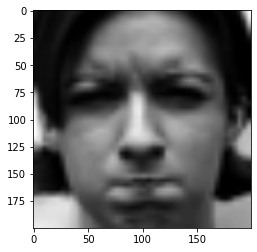

In [47]:
plt.imshow(X[0], cmap='gray')

In [48]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(971, 40000)

### DATA SPLITTING

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [50]:
xtrain.shape, xtest.shape

((776, 40000), (195, 40000))

### FEATURE SCALING

In [51]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### FEATURE SELECTION: USING PCA

In [52]:
from sklearn.decomposition import PCA

In [53]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(776, 40000) (195, 40000)


### TRAINING MODEL USING SVM AND LR


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [55]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [56]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### EVALUATION

In [57]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9897435897435898


In [58]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9368556701030928
Testing Score: 0.8666666666666667


### PREDICTION

In [59]:
# using SVM

pred = sv.predict(xtest)

In [60]:
# using Logistic Regression

pred2 = lg.predict(xtest)

In [61]:
misclassified=np.where(ytest!=pred)
misclassified


(array([  1,   6,  12,  14,  44,  52,  58,  67,  69,  71,  73,  85,  95,
         98, 101, 102, 116, 123, 126, 132, 135, 140, 148, 156, 174, 179],
       dtype=int64),)

In [62]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  26
2 2


In [63]:
dec = {0:'anger', 1:'contempt', 2:'disgust', 3:'fear', 4:'happy', 5:'sadness', 6:'surprise'}

### TESTING MODEL

#### USING SVM

disgust
surprise
happy
surprise
anger
sadness
anger
anger
anger


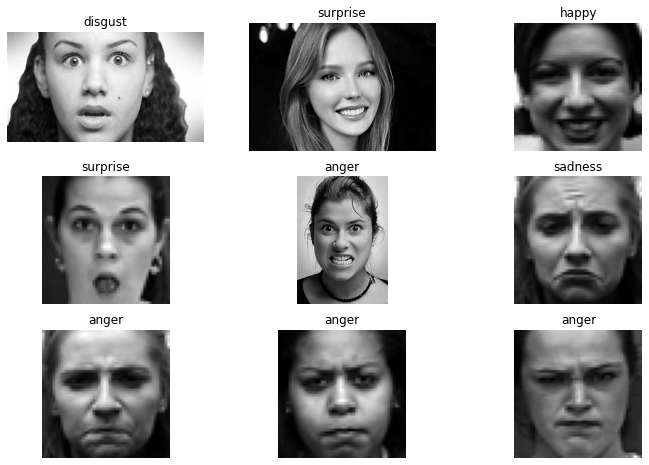

In [64]:
plt.figure(figsize=(12,8))
p = os.listdir('CK+48/TestImages/')
c=1
for i in os.listdir('CK+48/TestImages/imgs/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('CK+48/TestImages/imgs/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    print(dec[p[0]])
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [65]:

from sklearn import metrics


print( 'Accuracy : ' , metrics.accuracy_score(ytest, pred) )
print( 'precision : ' , metrics.precision_score(ytest, pred, average='micro') )
print( 'recall_score : ' , metrics.recall_score(ytest, pred, average='micro') )
print( 'fbeta_score : ' , metrics.fbeta_score(ytest, pred , beta = 0.5 , average='micro') )

Accuracy :  0.8666666666666667
precision :  0.8666666666666667
recall_score :  0.8666666666666667
fbeta_score :  0.8666666666666667


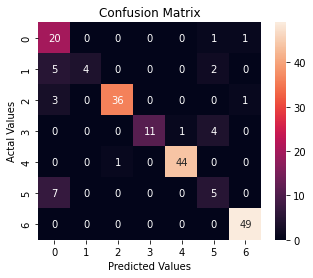

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(ytest, pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


#### USING LOGISTIC REGRESSION

contempt
happy
happy
surprise
contempt
sadness
anger
anger
anger


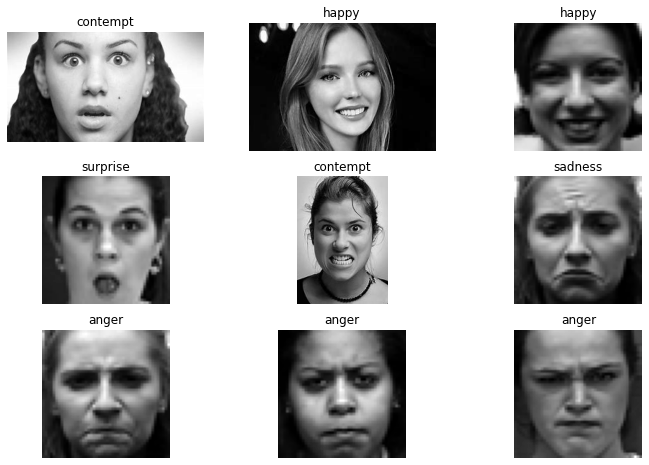

In [67]:
plt.figure(figsize=(12,8))
p = os.listdir('CK+48/TestImages/')
c=1
for i in os.listdir('CK+48/TestImages/imgs/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('CK+48/TestImages/imgs/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    print(dec[p[0]])
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [68]:

from sklearn import metrics


print( 'Accuracy : ' , metrics.accuracy_score(ytest, pred2) )
print( 'precision : ' , metrics.precision_score(ytest, pred2, average='micro') )
print( 'recall_score : ' , metrics.recall_score(ytest, pred2, average='micro') )
print( 'fbeta_score : ' , metrics.fbeta_score(ytest, pred2 , beta = 0.5 , average='micro') )

Accuracy :  0.9897435897435898
precision :  0.9897435897435898
recall_score :  0.9897435897435898
fbeta_score :  0.9897435897435897


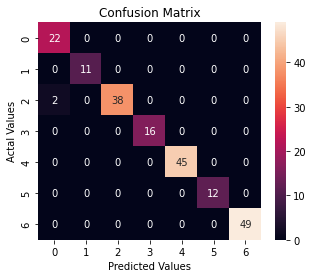

In [69]:
cm2 = confusion_matrix(ytest, pred2)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [73]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(sv, 'filename.pkl')




['filename.pkl']